<a href="https://colab.research.google.com/github/nantawat23308/UnsuperviseDimensionalityReduce/blob/main/Dimensional_Reduce_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.9 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
data_path = "/content/drive/MyDrive/Concrete_Data.xls"
data = pd.read_excel(data_path, sheet_name="Sheet1", index_col=None, header=0)

In [ ]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [ ]:
data.columns = [c.split('(')[0].strip() for c in data.columns]
data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


## Input Feature

In [ ]:
#ตัวแปรทุกตัวควร variance เท่ากัน model จะได้ไม่ไปสนใจตัวใดตัวหนึ่ง
# all feature have to being same variance because of model have to no bias
input_data = data.iloc[:, :-1]
# scalling
std_data = (input_data - input_data.mean()) / input_data.std()
std_data.head()


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476715,-0.856470,-0.846721,-0.916218,-0.619924,0.862741,-1.217067,-0.279597
1,2.476715,-0.856470,-0.846721,-0.916218,-0.619924,1.055658,-1.217067,-0.279597
2,0.491204,0.795146,-0.846721,2.174311,-1.038440,-0.526258,-2.239824,3.551340
3,0.491204,0.795146,-0.846721,2.174311,-1.038440,-0.526258,-2.239824,5.055221
4,-0.790048,0.678084,-0.846721,0.488568,-1.038440,0.070497,0.647594,4.976069


In [ ]:
pca = PCA(random_state=25)
pca.fit(std_data)
pca_embed = pca.transform(std_data)

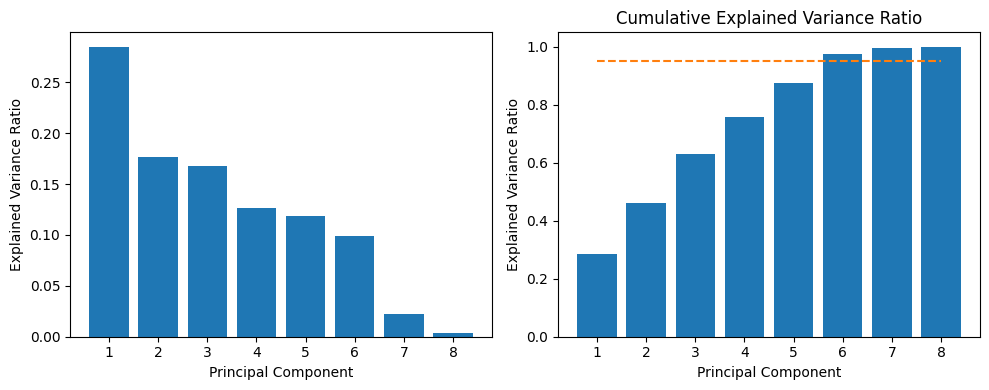

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)

plt.bar(range(1, pca.n_components_ +1), pca.explained_variance_ratio_)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")

plt.subplot(1,2,2)

cumulative = np.cumsum(pca.explained_variance_ratio_)
plt.bar(range(1, pca.n_components_ +1), cumulative)
plt.plot([1, std_data.shape[1]], [0.95, 0.95], "--", color='tab:orange')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Cumulative Explained Variance Ratio")

plt.tight_layout()
plt.show()

Variance each feature correlate in same range
Feature varian not quite difference over other have to use many feature to model
<br>
*If have some feature higher than other so far that feature can be the one to use*\:

Line plot on 95 % of data
Can use 6 feature to cover 95 % variance

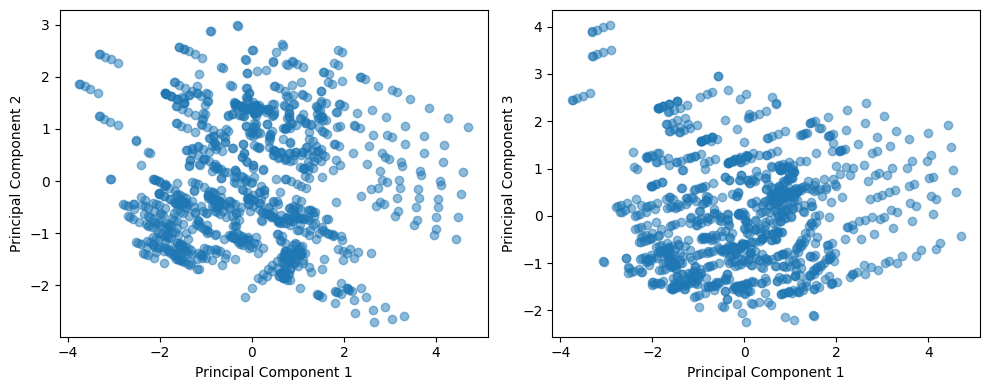

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.scatter(pca_embed[:, 0], pca_embed[:, 1], alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.subplot(1, 2, 2)
plt.scatter(pca_embed[:, 0], pca_embed[:, 2], alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 3")

plt.tight_layout()
plt.show()

plot variance on 1,2 and 1,3

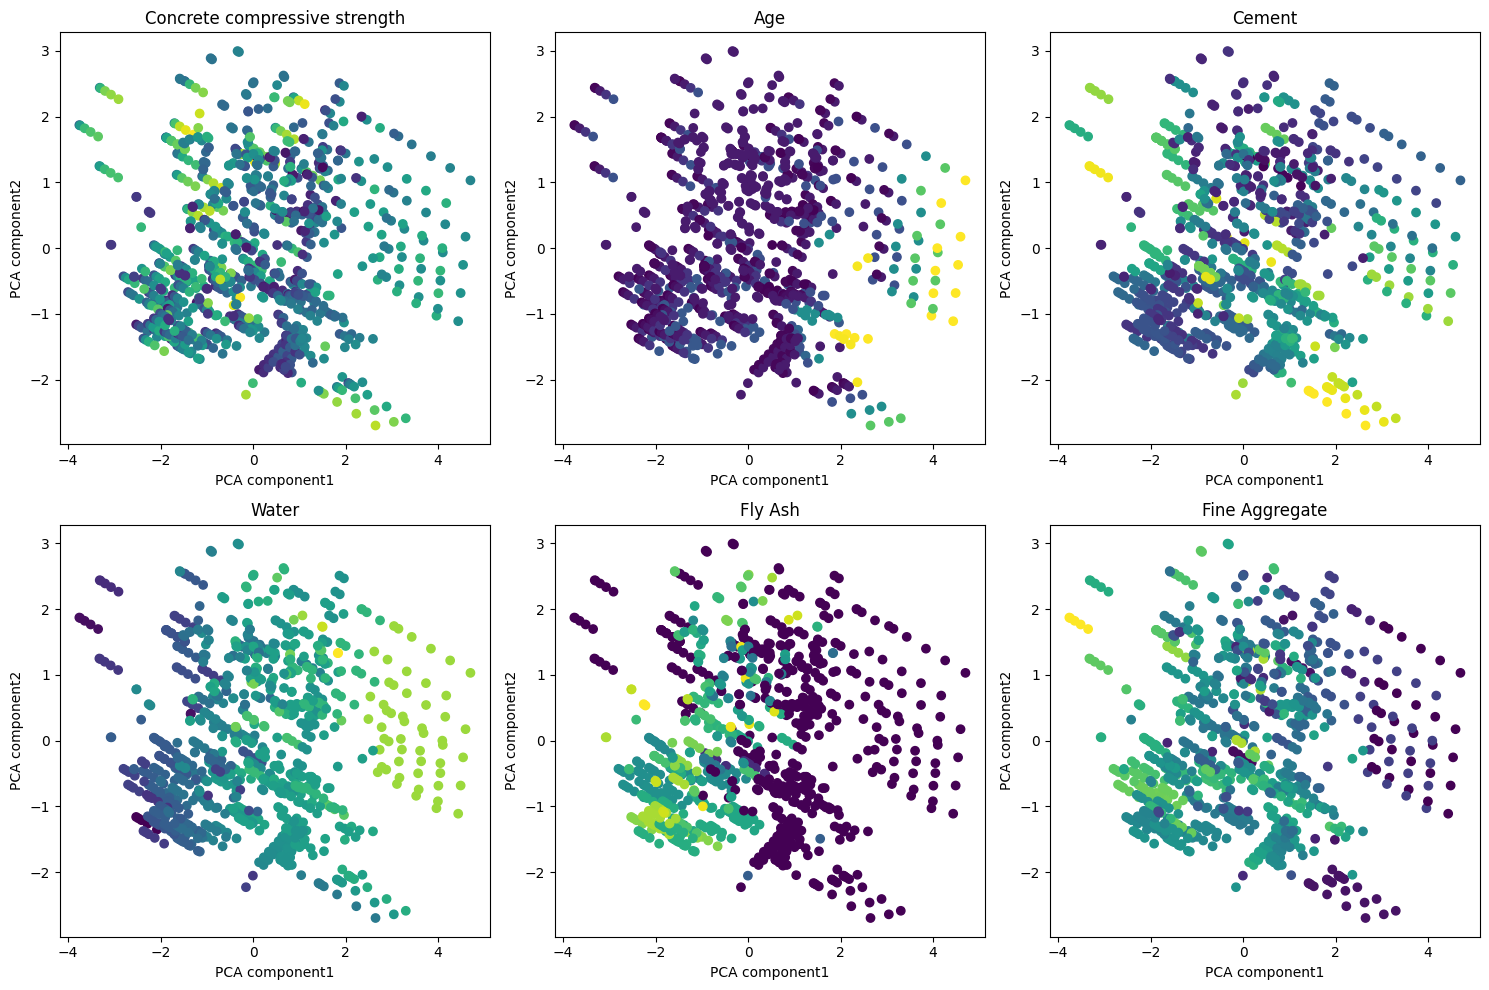

In [ ]:
plt.figure(figsize=(15,10))

for i, feature in enumerate(["Concrete compressive strength", "Age", "Cement", "Water", "Fly Ash", "Fine Aggregate"], start = 1):
  plt.subplot(2,3,i)
  plt.scatter(pca_embed[:, 0], pca_embed[:, 1], c =data[feature]);
  plt.xlabel("PCA component1")
  plt.ylabel("PCA component2")
  plt.title(f"{feature}")

plt.tight_layout()
plt.show()


## Filter Age OUT

In [ ]:
mix_data = std_data.iloc[:, :-1].drop_duplicates()
print(std_data.shape)
print(mix_data.shape)
mix_data.head()

(1030, 8)
(428, 7)


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate
0,2.476715,-0.856470,-0.846721,-0.916218,-0.619924,0.862741,-1.217067
1,2.476715,-0.856470,-0.846721,-0.916218,-0.619924,1.055658,-1.217067
2,0.491204,0.795146,-0.846721,2.174311,-1.038440,-0.526258,-2.239824
4,-0.790048,0.678084,-0.846721,0.488568,-1.038440,0.070497,0.647594
5,-0.145116,0.464823,-0.846721,2.174311,-1.038440,-0.526258,-1.291903


In [ ]:
pca2 = PCA(random_state=25)
pca2.fit(mix_data)
pca_embed2 = pca2.transform(mix_data)

Text(0.5, 1.0, 'Cumulative Explained Variance Ratio')

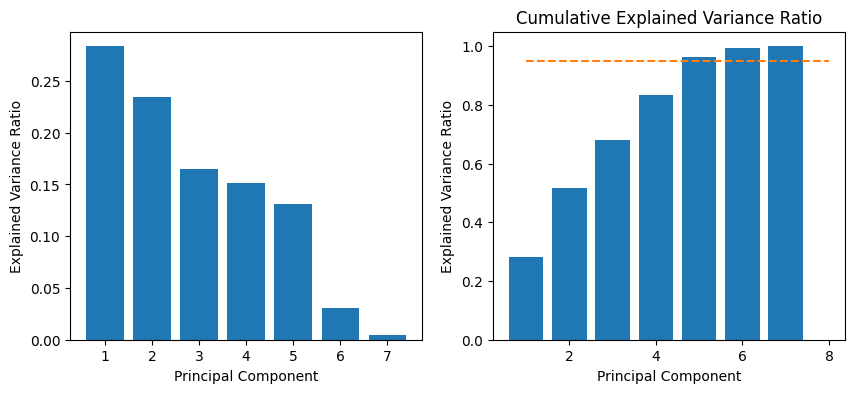

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.bar(range(1, pca2.n_components_ + 1), pca2.explained_variance_ratio_)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")

plt.subplot(1,2,2)
cumulative2 = np.cumsum(pca2.explained_variance_ratio_)
plt.bar(range(1, pca2.n_components_ +1), cumulative2)
plt.plot([1, std_data.shape[1]], [0.95, 0.95], "--", color='tab:orange')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Cumulative Explained Variance Ratio")

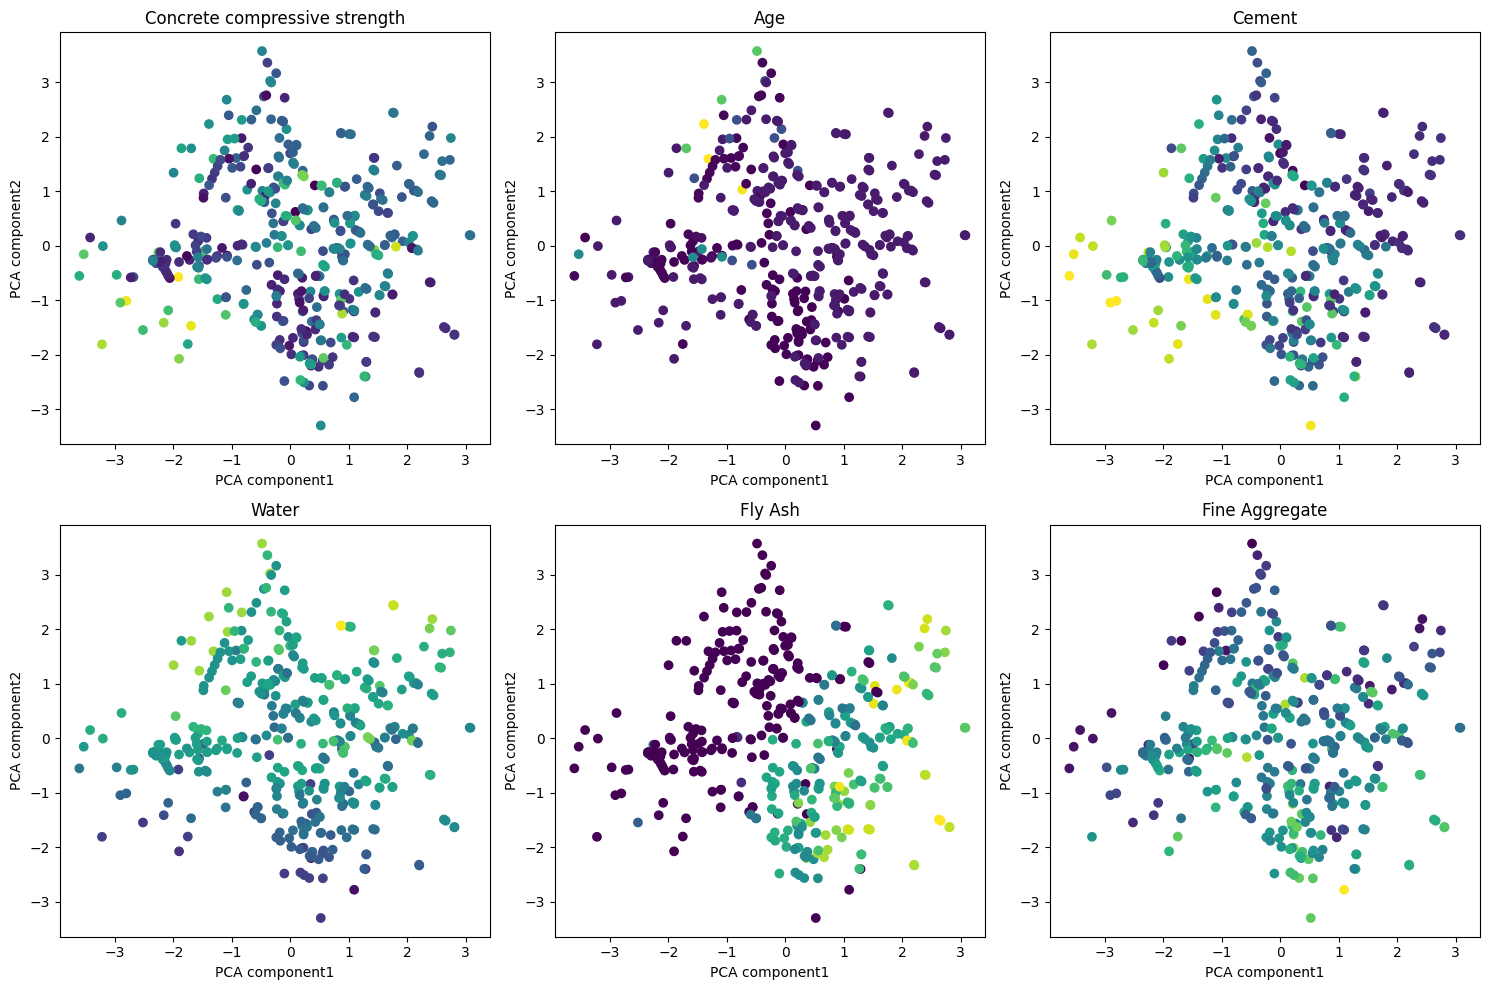

In [ ]:
plt.figure(figsize=(15,10))

for i, feature in enumerate(["Concrete compressive strength", "Age", "Cement", "Water", "Fly Ash", "Fine Aggregate"], start = 1):
  plt.subplot(2,3,i)
  plt.scatter(pca_embed2[:, 0], pca_embed2[:, 1], c =data[feature].loc[mix_data.index]);
  plt.xlabel("PCA component1")
  plt.ylabel("PCA component2")
  plt.title(f"{feature}")

plt.tight_layout()
plt.show()


In [ ]:
print(pca2.components_[0])

[-0.41053999  0.21055805  0.56348509  0.02159643  0.42728007 -0.53068738
  0.07030661]


In [ ]:
print(pca.components_[0])

[ 0.09827295  0.17725317 -0.39464178  0.54705427 -0.50591697  0.03805569
 -0.40190575  0.29152151]


# PC1

Text(0, 0.5, 'PCA Component')

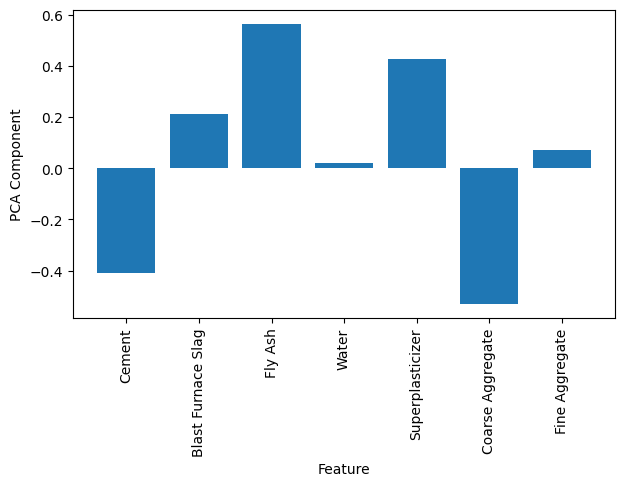

In [ ]:
plt.figure(figsize=(7,4))
plt.bar(range(mix_data.shape[1]), pca2.components_[0])
plt.xticks(range(mix_data.shape[1]), mix_data.columns, rotation=90)
plt.xlabel("Feature")
plt.ylabel("PCA Component")

# PC2

Text(0, 0.5, 'PCA Component')

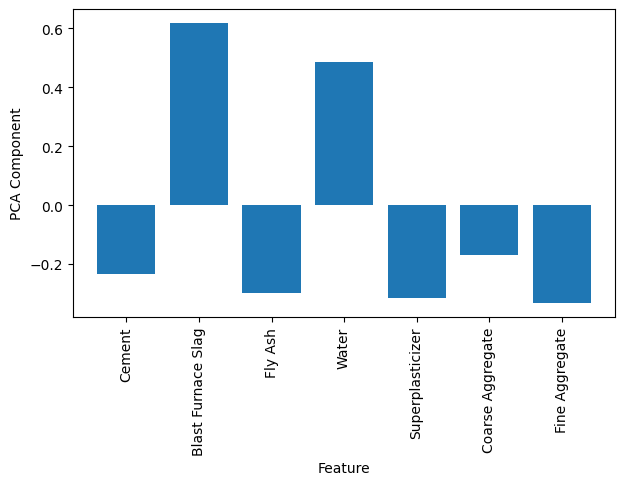

In [ ]:
plt.figure(figsize=(7,4))
plt.bar(range(mix_data.shape[1]), pca2.components_[1])
plt.xticks(range(mix_data.shape[1]), mix_data.columns, rotation=90)
plt.xlabel("Feature")
plt.ylabel("PCA Component")

# No scalling with SD

In [ ]:
center_data = input_data - input_data.mean()
center_data = center_data.iloc[:, :-1].drop_duplicates()
center_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate
0,258.834369,-73.895485,-54.187136,-19.566359,-3.703112,67.081408,-97.578883
1,258.834369,-73.895485,-54.187136,-19.566359,-3.703112,82.081408,-97.578883
2,51.334369,68.604515,-54.187136,46.433641,-6.203112,-40.918592,-179.578883
4,-82.565631,58.504515,-54.187136,10.433641,-6.203112,5.481408,51.921117
5,-15.165631,40.104515,-54.187136,46.433641,-6.203112,-40.918592,-103.578883


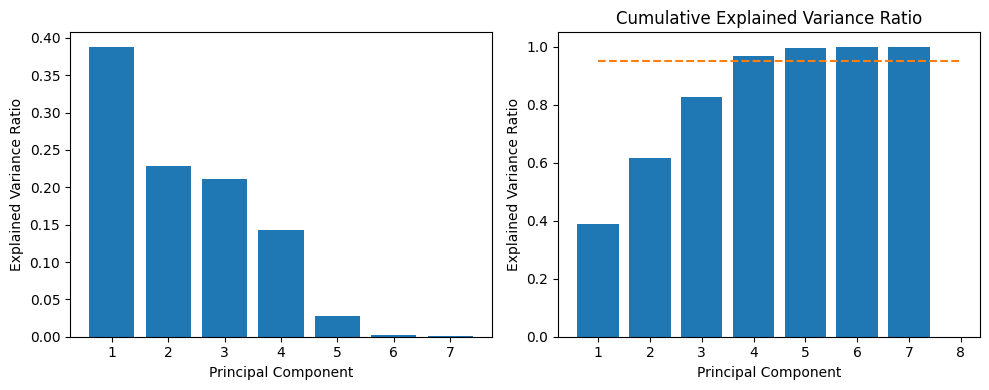

In [ ]:
pca = PCA(random_state=25)
pca.fit(center_data)
pca_embed = pca.transform(center_data)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.bar(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")

plt.subplot(1,2,2)
comulative = np.cumsum(pca.explained_variance_ratio_)
plt.bar(range(1, pca.n_components_ +1), comulative)
plt.plot([1, std_data.shape[1]], [0.95, 0.95], "--", color='tab:orange')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Cumulative Explained Variance Ratio")

plt.tight_layout()
plt.show()

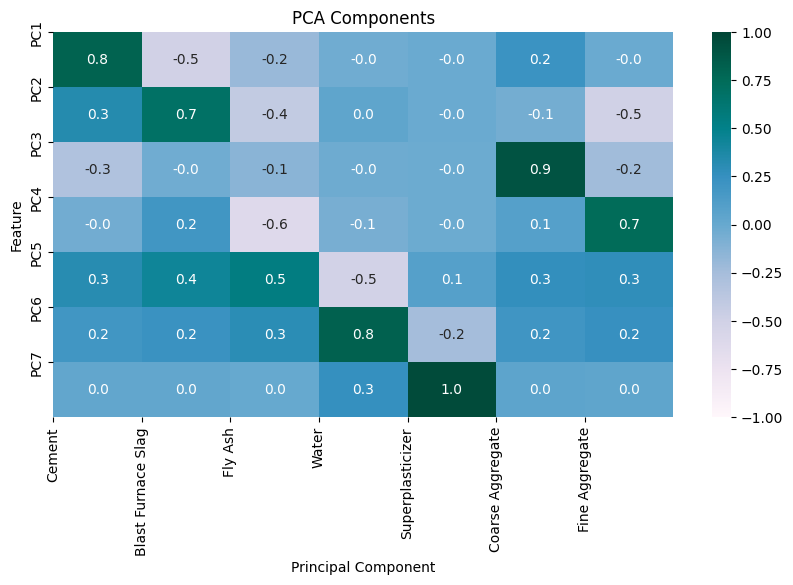

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(pca.components_, cmap="PuBuGn", vmin = -1, vmax=1,annot=True, fmt=".1f")
plt.xticks(range(pca.components_.shape[1]), labels=center_data.columns, rotation=90)
plt.yticks(range(pca.n_components_), labels=["PC" + str(i) for i in range(1, pca.n_components_ +1 )], )
plt.xlabel("Principal Component")
plt.ylabel("Feature")
plt.title("PCA Components")
plt.show()

Text(0, 0.5, 'Standard Deviation')

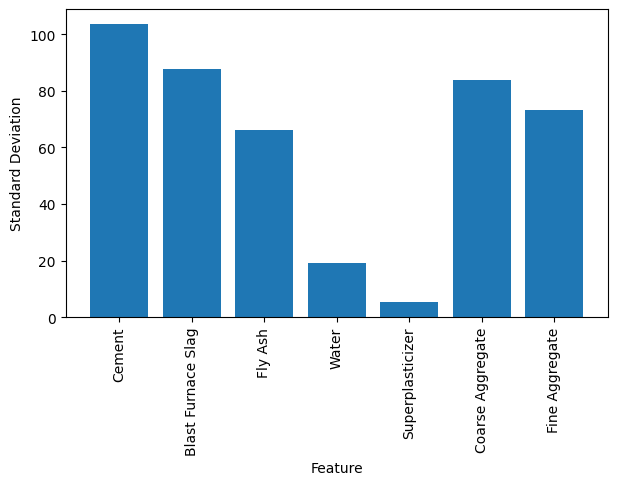

In [ ]:
plt.figure(figsize=(7,4))
plt.bar(range(center_data.shape[1]), center_data.std())
plt.xticks(range(center_data.shape[1]), labels=center_data.columns, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Standard Deviation")

# t-SNE

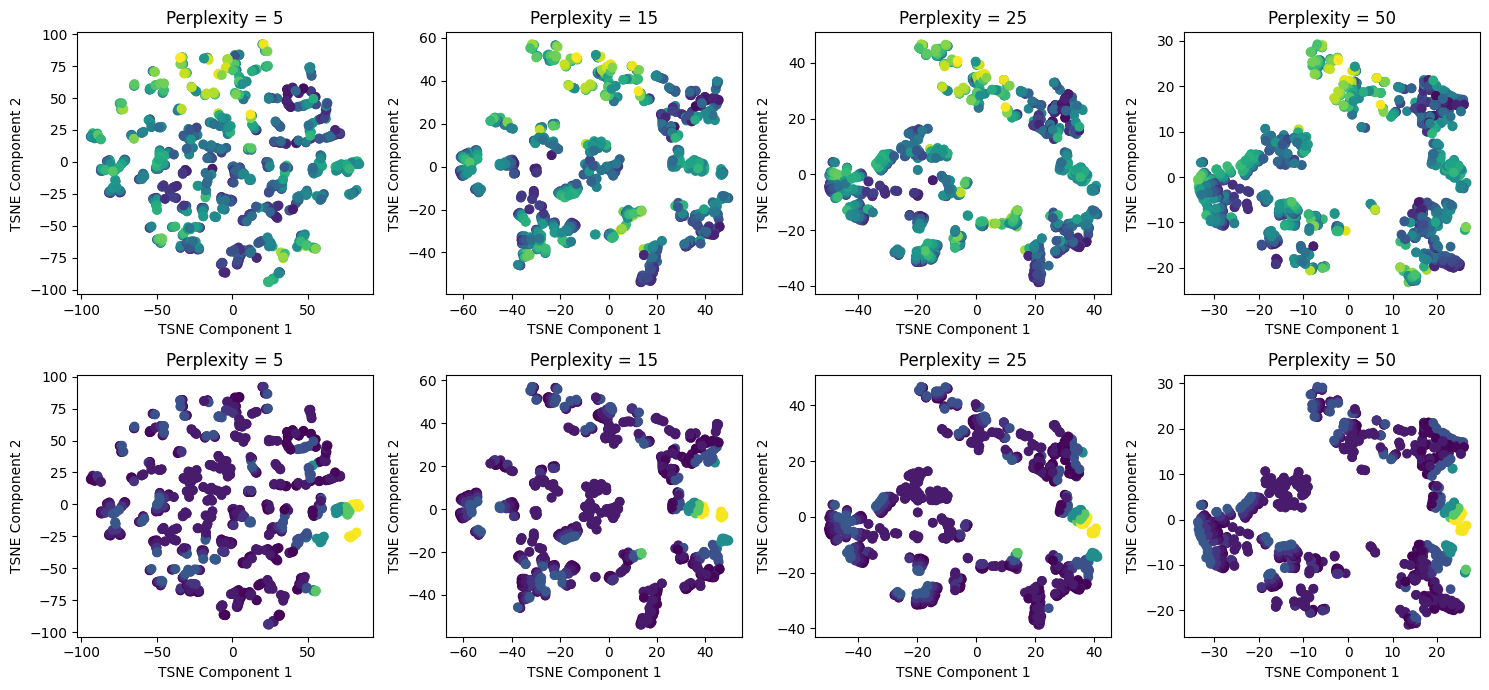

In [ ]:
perplexity = [5, 15, 25, 50]

plt.figure(figsize=(15,7))

for i, k in enumerate(perplexity, start=1):
  plt.subplot(2,4,i)
  tsne = TSNE(n_components=2, perplexity=k, random_state=25)
  tsne_embed = tsne.fit_transform(std_data)
  plt.scatter(tsne_embed[:, 0], tsne_embed[:, 1], c= data["Concrete compressive strength"])
  plt.xlabel("TSNE Component 1")
  plt.ylabel("TSNE Component 2")
  plt.title(f"Perplexity = {k}")

  plt.subplot(2,4, i+4)
  plt.scatter(tsne_embed[:, 0], tsne_embed[:, 1], c= data["Age"])
  plt.xlabel("TSNE Component 1")
  plt.ylabel("TSNE Component 2")
  plt.title(f"Perplexity = {k}")

plt.tight_layout()
plt.show()


# UMAP

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridd

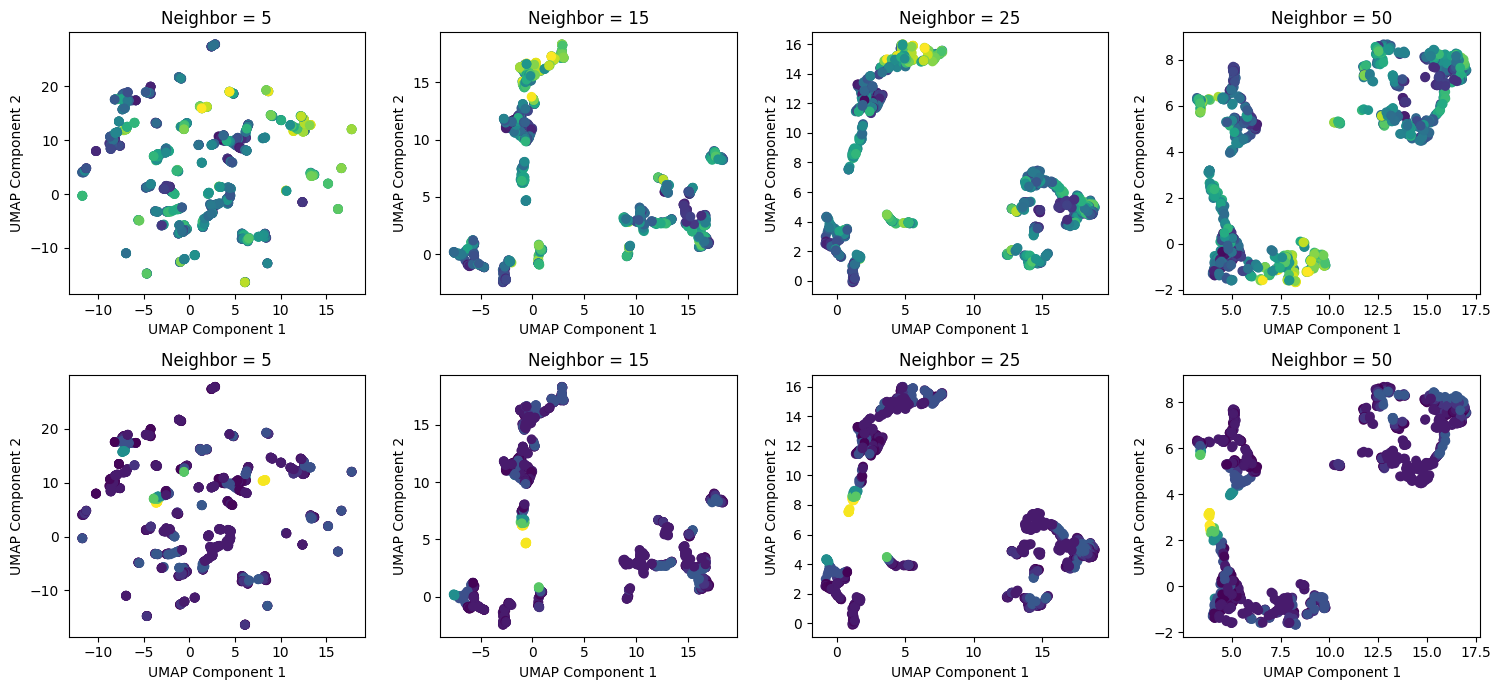

In [ ]:
neighbors = [5, 15, 25, 50]

plt.figure(figsize=(15,7))

for i, n in enumerate(neighbors, start=1):
  plt.subplot(2,4,i)
  umap_ins = umap.UMAP(n_components=2, n_neighbors=n, random_state=25)
  umap_embed = umap_ins.fit_transform(std_data)
  plt.scatter(umap_embed[:, 0], umap_embed[:, 1], c= data["Concrete compressive strength"])
  plt.xlabel("UMAP Component 1")
  plt.ylabel("UMAP Component 2")
  plt.title(f"Neighbor = {n}")

  plt.subplot(2,4, i+4)
  plt.scatter(umap_embed[:, 0], umap_embed[:, 1], c= data["Age"])
  plt.xlabel("UMAP Component 1")
  plt.ylabel("UMAP Component 2")
  plt.title(f"Neighbor = {n}")

plt.tight_layout()
plt.show()


## Increase Min Dist for help to interprete and visualize

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


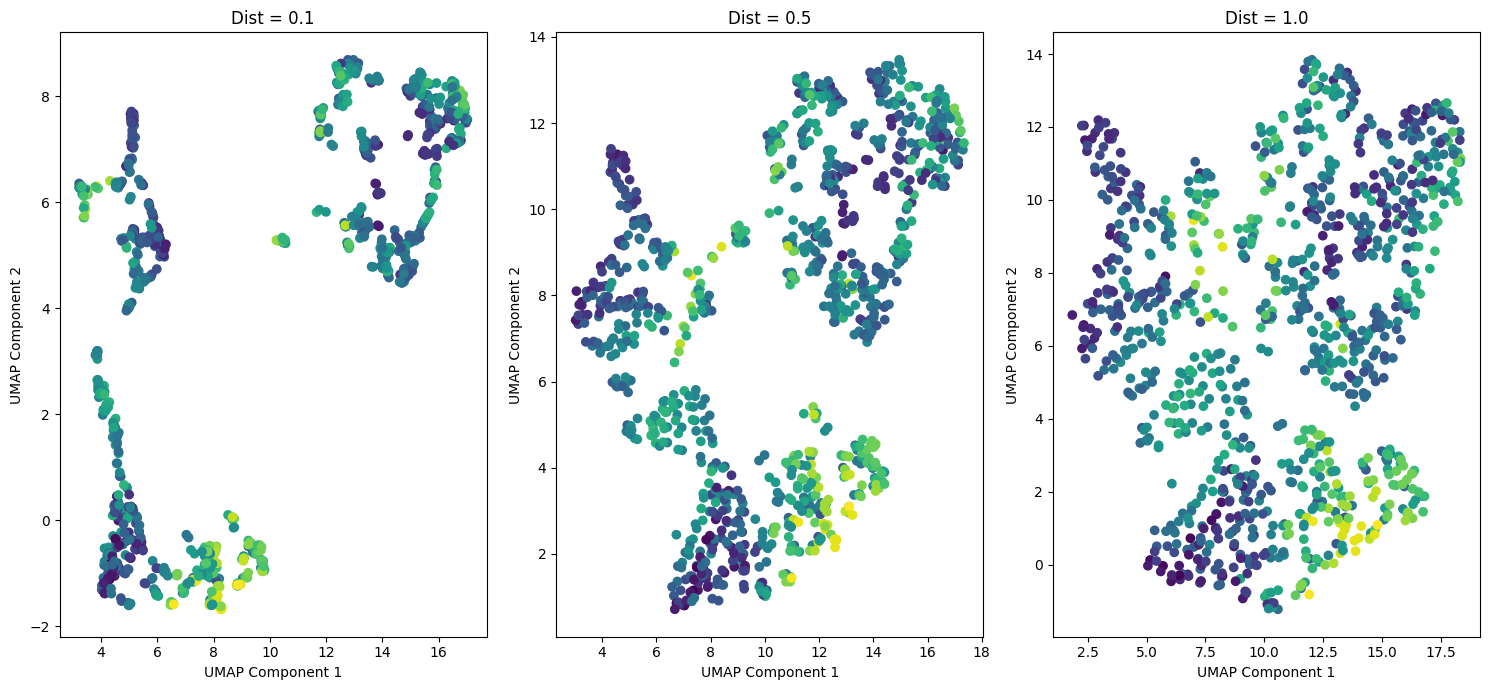

In [ ]:
dists = [0.1, 0.5, 1.0]

plt.figure(figsize=(15,7))

for i, d in enumerate(dists, start=1):
  plt.subplot(1,3,i)
  umap_ins = umap.UMAP(n_components=2, n_neighbors=50, random_state=25, min_dist=d)
  umap_embed = umap_ins.fit_transform(std_data)
  plt.scatter(umap_embed[:, 0], umap_embed[:, 1], c= data["Concrete compressive strength"])
  plt.xlabel("UMAP Component 1")
  plt.ylabel("UMAP Component 2")
  plt.title(f"Dist = {d}")

plt.tight_layout()
plt.show()


## Varaince of each feature

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


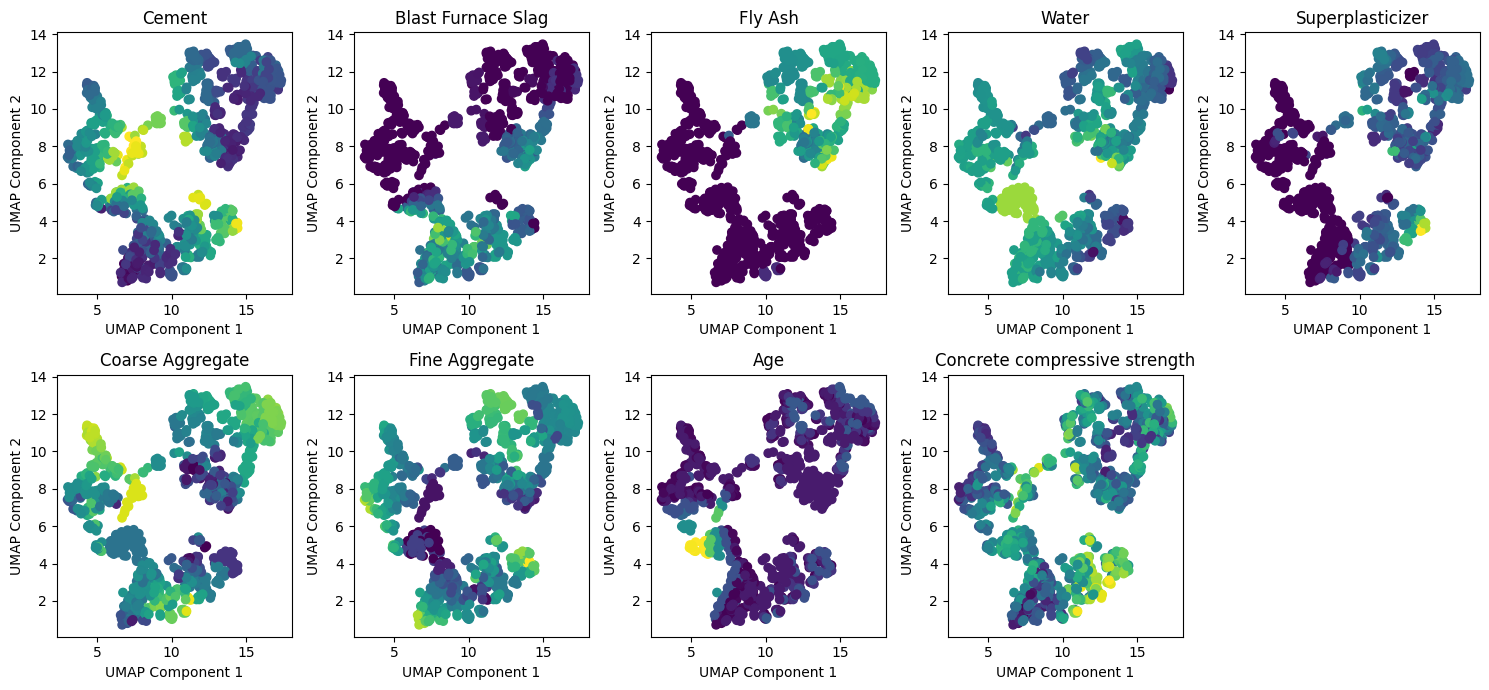

In [ ]:
umap_embed = umap.UMAP(n_components=2, n_neighbors=50, random_state=25, min_dist=0.5).fit_transform(std_data)

plt.figure(figsize=(15,7))

for i, feature in enumerate(data.columns, start=1):
  plt.subplot(2,5,i)
  plt.scatter(umap_embed[:,0], umap_embed[:,1], c=data[feature])
  plt.xlabel("UMAP Component 1")
  plt.ylabel("UMAP Component 2")
  plt.title(f"{feature}")
plt.tight_layout()
plt.show()